# Feature Matching

국민대학교 차량지능특론 SLAM 파트 과제 2

- 학번 : A2021019
- 이름 : 김태산

---

OpenCV를 사용하여 feature description을 얻어내고, 이를 이용해 feature matching을 진행한다.

- 지난 시간에 얻은 ORB feature, SIFT feature 등에 대한 description을 얻어낸다.
- 이를 이용해 두 이미지 간의 feature matching을 진행한다.


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/3.4/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677)
- Colab에서 코드에 이상이 없음에도 불구하고 결과가 제대로 나오지 않을 경우, '런타임 다시 시작...'을 해보도록 한다.

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 2021년 6월 14일까지입니다.
- 과제는 Colab에서 작성한 것을 다운받아 (파일-.ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [1]:
!pip3 uninstall opencv-python
!pip3 install -U opencv-contrib-python==3.4.2.17

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 138kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
numpy 1.19.5
opencv 3.4.2


In [3]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/work1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

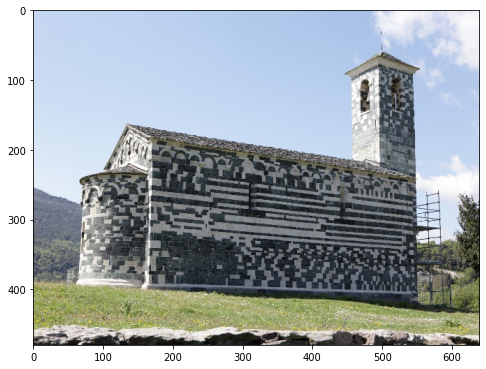

In [5]:
img = cv.imread(ROOT + 'feature/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Brute-Force Matching

brute-force matcher를 사용해 feature matching을 진행한다.

### feature matching을 진행할 두 이미지 불러오기

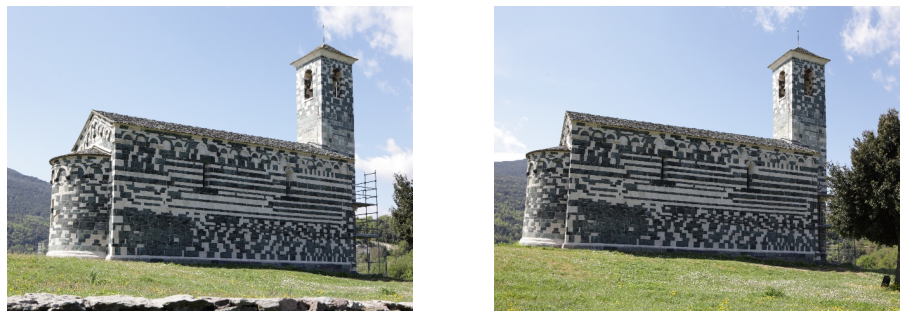

In [ ]:
img1 = cv.imread(ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread(ROOT + 'feature/DPP_0011.JPG')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(img2[:,:,::-1])
plt.axis('off')
plt.show()

### ORB feature 얻기

지난 과제를 통해 실습한 ORB feature를 구한다.

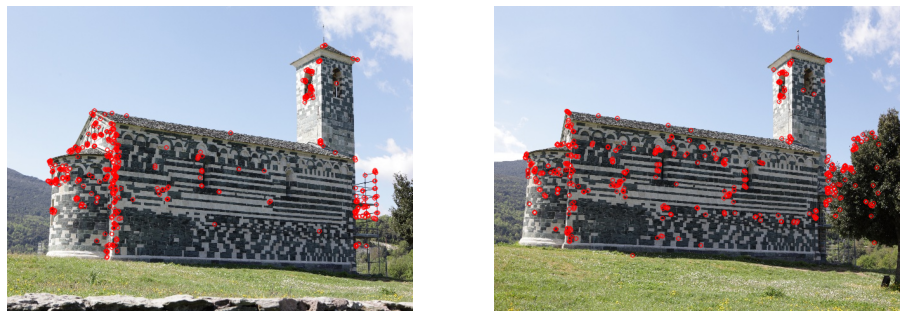

In [ ]:
img1 = cv.imread(ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread(ROOT + 'feature/DPP_0011.JPG')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# To-do : 각 이미지에 대해 orb feature를 얻고 시각화하기
retval = cv.ORB_create()
feature1 = retval.detect(gray1, None)
orb_kps_img1 = cv.drawKeypoints(img1, feature1, None, color=(0, 0, 255))

feature2 = retval.detect(gray2, None)
orb_kps_img2 = cv.drawKeypoints(img2, feature2, None, color=(0, 0, 255))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(orb_kps_img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(orb_kps_img2[:,:,::-1])
plt.axis('off')
plt.show()

### ORB descriptor 구하기

**과제** 
- 찾은 feature에 대해 descriptor를 구한다.

관련 함수

- `	keypoints, descriptors	=	cv.Feature2D.compute(	image, keypoints[, descriptors]	)`
- `keypoints, descriptors	=	cv.Feature2D.detectAndCompute(	image, mask[, descriptors[, useProvidedKeypoints]]	)`

---
### 1. 찾은 feature에 대해 descriptor를 구한다.

In [ ]:
# To-do
kps1, des1 = retval.detectAndCompute(gray1, None)
kps2, des2 = retval.detectAndCompute(gray2, None)

### Brute-Force Matching

**과제** 
- feature matching을 진행하고 시각화한다.
- matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.

관련 함수

`	<BFMatcher object>	=	cv.BFMatcher(	[, normType[, crossCheck]]	) `

---
### 1. feature matching을 진행하고 시각화한다.
- `cv.BFMatcher`에서 normType 옵션의 경우 ORB를 사용할 때에는 cv.NORM_HAMMING으로, SIFT를 사용할 때에는 cv.NORM_L2로 설정한다.

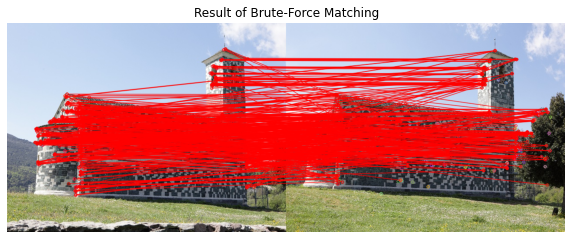

In [ ]:
# To-do
bf = cv.BFMatcher(normType=cv.NORM_HAMMING, crossCheck=False)
matches = bf.match(des1, des2)
img_kps_match = cv.drawMatches(img1, kps1, img2, kps2, matches, None, matchColor=(0, 0, 255))
plt.figure(figsize=(10, 5))
plt.title("Result of Brute-Force Matching")
plt.imshow(img_kps_match[:,:,::-1])
plt.axis('off')
plt.show()

### 2. matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.
- cycle consistency의 경우 `cv.BFMatcher`의 crossCheck 옵션을 True로 지정하면 된다.
- cycle consistency는 옵션 명에서도 알 수 있듯이 양쪽에서 모두 확인하는 것이다.
- 첫번째 이미지에서 두번째 이미지로의 feature matching이 두번째 이미지에서 첫번째 이미지로의 feature matching과 일치하는지를 확인하여, 일치하지 않을 경우 해당 match를 제외한다.
- 아래의 결과를 보면, cycle consistency를 사용하지 않은 경우(첫번째 그림) 육안 상으로도 잘못된 match들이 상당히 많은 것을 알 수 있다.
- 반면, cycle consistency를 사용한 경우(두번째 그림) 잘못된 match들을 걸러내기 때문에 비교적 잘못된 match가 줄어든 것을 알 수 있고 실제로 match의 수가 cycle consistency를 사용하지 않았을 때에 비해 절반 정도로 줄어든 것을 볼 수 있다.

# of matches without cycle-consistency: 500
# of matches with cycle-consistency: 258


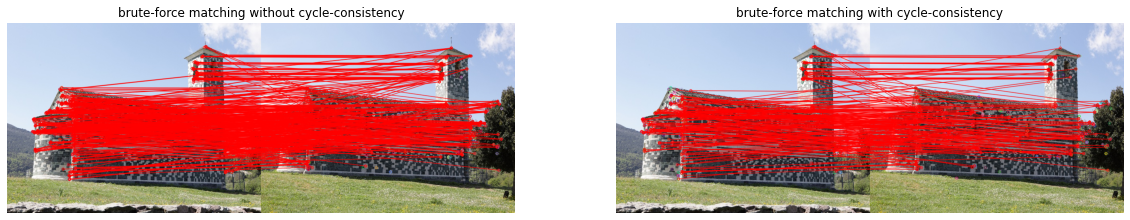

In [ ]:
crossChecks = [False, True]

plt.figure(figsize=(20, 5))
for i, cCheck in enumerate(crossChecks):
  bf = cv.BFMatcher(normType=cv.NORM_HAMMING, crossCheck=cCheck)
  matches = bf.match(des1, des2)
  img_kps_match = cv.drawMatches(img1, kps1, img2, kps2, matches, None, matchColor=(0, 0, 255))
  plt.subplot("12" + str(i + 1))
  plt.axis('off')
  if cCheck == False:
    plt.title("brute-force matching without cycle-consistency")
    print("# of matches without cycle-consistency:", len(matches))
  else:
    plt.title("brute-force matching with cycle-consistency")
    print("# of matches with cycle-consistency:", len(matches))
  plt.imshow(img_kps_match[:,:,::-1])
  
plt.show()

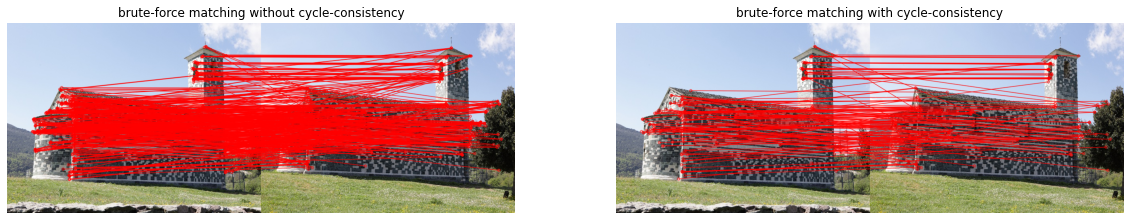

In [ ]:
# 결과 이미지 예시

### SIFT feature 얻기

이번 단계에서는 SIFT feature에 대해 매칭을 진행한다.

지난 과제를 통해 실습한 SIFT feature를 구한다.

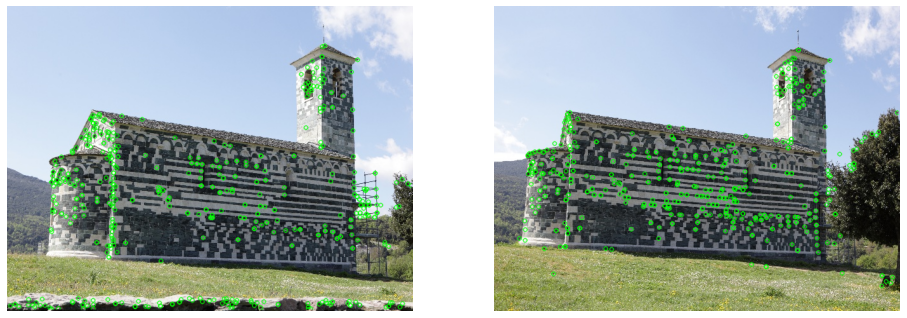

In [ ]:
img1 = cv.imread(ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread(ROOT + 'feature/DPP_0011.JPG')

# To-do : 각 이미지에 대해 SIFT feature를 얻고 시각화하기
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

retval = cv.xfeatures2d.SIFT_create(nfeatures=500)

kps1 = retval.detect(gray1, None)
SIFT_kps_img1 = cv.drawKeypoints(img1, kps1, None, color=(0, 255, 0))

kps2 = retval.detect(gray2, None)
SIFT_kps_img2 = cv.drawKeypoints(img2, kps2, None, color=(0, 255, 0))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(SIFT_kps_img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(SIFT_kps_img2[:,:,::-1])
plt.axis('off')
plt.show()

### SIFT descriptor 구하기

**과제** 
- 찾은 feature에 대해 descriptor를 구한다.

관련 함수

- `	keypoints, descriptors	=	cv.Feature2D.compute(	image, keypoints[, descriptors]	)`
- `keypoints, descriptors	=	cv.Feature2D.detectAndCompute(	image, mask[, descriptors[, useProvidedKeypoints]]	)`

---
### 1. 찾은 feature에 대해 descriptor를 구한다.

In [ ]:
# To-do
kps1, des1 = retval.compute(gray1, kps1)
kps2, des2 = retval.compute(gray2, kps2)

### Brute-Force Matching

**과제** 
- feature matching을 진행하고 시각화한다.
- matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.

관련 함수

`	<BFMatcher object>	=	cv.BFMatcher(	[, normType[, crossCheck]]	)
`

---
### 1. feature matching을 진행하고 시각화한다.

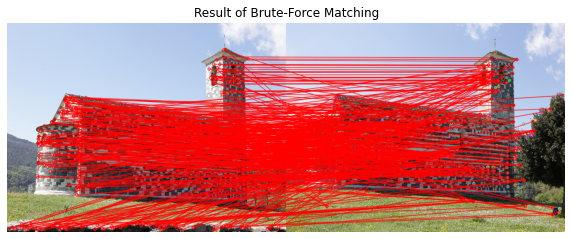

In [ ]:
# To-do
bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=False)
matches = bf.match(des1, des2)
img_kps_match = cv.drawMatches(img1, kps1, img2, kps2, matches, None, matchColor=(0, 0, 255))
plt.figure(figsize=(10, 5))
plt.title("Result of Brute-Force Matching")
plt.imshow(img_kps_match[:,:,::-1])
plt.axis('off')
plt.show()

### 2. matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.
- 마찬가지로 cycle consistency를 사용할 때에는 `cv.BFMatcher`의 crossCheck 옵션을 True로 지정하면 된다.
- 결과를 보면, ORB feature를 사용할 때와 마찬가지로 SIFT feature를 사용할 때에도 cycle consistency를 사용하였을 때 잘못된 match의 수가 확연하게 줄어든 것을 확인할 수 있다.

# of matches without cycle-consistency: 500
# of matches with cycle-consistency: 276


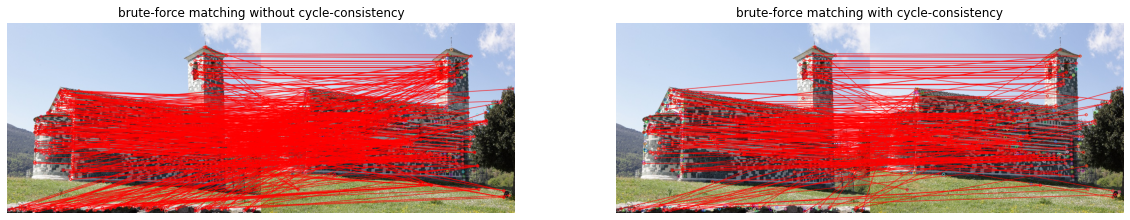

In [ ]:
crossChecks = [False, True]

plt.figure(figsize=(20, 5))
for i, cCheck in enumerate(crossChecks):
  bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=cCheck)
  matches = bf.match(des1, des2)
  img_kps_match = cv.drawMatches(img1, kps1, img2, kps2, matches, None, matchColor=(0, 0, 255))
  plt.subplot("12" + str(i + 1))
  plt.axis('off')
  if cCheck == False:
    plt.title("brute-force matching without cycle-consistency")
    print("# of matches without cycle-consistency:", len(matches))
  else:
    plt.title("brute-force matching with cycle-consistency")
    print("# of matches with cycle-consistency:", len(matches))
  plt.imshow(img_kps_match[:,:,::-1])
  
plt.show()

## 다른 이미지에도 적용해보기

위 실습을 바탕으로 주어진 이미지 외에 다른 이미지에도 feature matching을 진행한다. 

- 한 물체를 다른 각도에서 찍은 이미지 2장을 불러온다. (직접 찍은 사진, 인터넷에서 다운로드한 사진 모두 가능)
- 이미지들에 대해 feature matching을 진행한다.
  - feature descriptor는 자유롭게 하나를 선택한다.
  - cycle consistency를 추가한 것과 아닌 것을 비교한다.
---
- feature descriptor로는 SIFT를 사용하였다.
- 아래의 결과를 보면, 주어진 이미지만큼은 아니지만 다른 이미지에 대해서도 feature matching이 어느 정도 되는 것을 볼 수 있다.
- 또한, cycle consistency를 추가하였을 때가 추가하지 않았을 때보다 잘못된 match의 수가 훨씬 적음을 알 수 있고, 이는 육안 상으로도 확인이 가능하다.

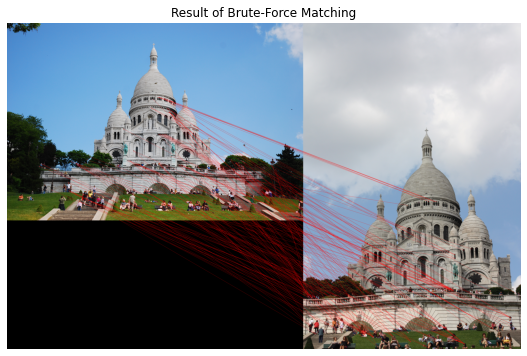

# of matches without cycle-consistency: 200
# of matches with cycle-consistency: 101


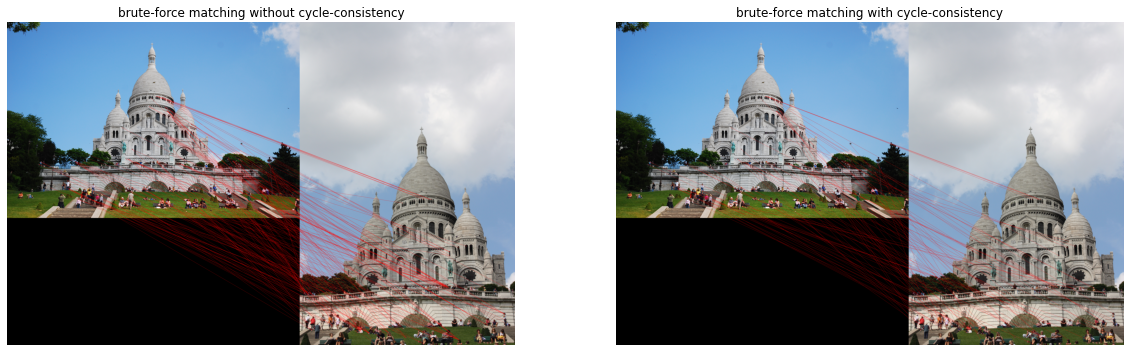

In [7]:
# To-do
img1 = cv.imread(ROOT + 'feature/feature_matching_test1.jpg')
img2 = cv.imread(ROOT + 'feature/feature_matching_test2.jpg')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

retval = cv.xfeatures2d.SIFT_create(nfeatures=200)

kps1, des1 = retval.detectAndCompute(gray1, None)
kps2, des2 = retval.detectAndCompute(gray2, None)

bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=False)
matches = bf.match(des1, des2)
img_kps_match = cv.drawMatches(img1, kps1, img2, kps2, matches, None, matchColor=(0, 0, 255))
plt.figure(figsize=(15, 6))
plt.title("Result of Brute-Force Matching")
plt.imshow(img_kps_match[:,:,::-1])
plt.axis('off')
plt.show()

crossChecks = [False, True]

plt.figure(figsize=(20, 6))
for i, cCheck in enumerate(crossChecks):
  bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=cCheck)
  matches = bf.match(des1, des2)
  img_kps_match = cv.drawMatches(img1, kps1, img2, kps2, matches, None, matchColor=(0, 0, 255))
  plt.subplot("12" + str(i + 1))
  plt.axis('off')
  if cCheck == False:
    plt.title("brute-force matching without cycle-consistency")
    print("# of matches without cycle-consistency:", len(matches))
  else:
    plt.title("brute-force matching with cycle-consistency")
    print("# of matches with cycle-consistency:", len(matches))
  plt.imshow(img_kps_match[:,:,::-1])
  
plt.show()

## 추가 점수 과제

- opencv에서는`BFMathcer` 외의 다른 matcher를 제공한다. 이러한 다른 matcher를 이용해 같은 과정을 진행한다.
- 해당 matcher에 대해 간단히 조사해 보고, 각 과정에 대한 설명도 기술한다.
---
### FLANN Based Matcher
- FLANN은 Fast Library for Approximate Nearest Negibors의 약어이다.
- FLANN based Matcher의 경우 큰 데이터셋을 사용할 때 BFMatcher보다 훨씬 빠르게 동작한다고 한다.
- FLANN based Matcher를 사용할 때에는 IndexParams와 SearchParams 옵션을 설정해주어야 하는데, IndexParams의 경우 ORB 알고리즘을 사용할 때와 SIFT 및 SURF 알고리즘을 사용할 때의 설정이 다르다.
- 이번 실습에서는 SIFT 알고리즘을 사용할 것이므로 다음과 같이 설정한다.  
  `index_params = dict(algorithm=1, trees=5)`

- searchParams는 인덱스의 트리가 재귀적으로 선회해야 할 횟수를 지정하는 파라미터로, 해당 값이 클수록 feature matching의 결과가 좋아질 수 있지만, 그만큼 연산량은 늘어나므로 시간이 더 오래 걸린다.
- searchParams는 다음과 같이 설정한다.  
  `search_params = dict(checks=50)`

- 결과를 보면, BF Matcher를 사용할 때와 비슷하게 feature matching이 되는 것을 알 수 있다.

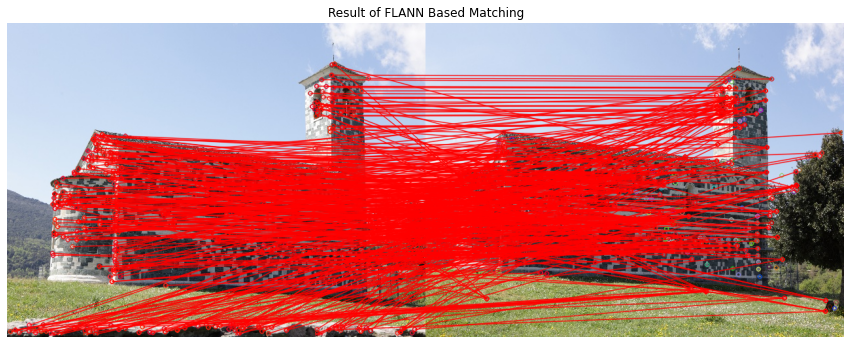

In [8]:
# To-do
img1 = cv.imread(ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread(ROOT + 'feature/DPP_0011.JPG')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

retval = cv.xfeatures2d.SIFT_create(nfeatures=500)
kps1, des1 = retval.detectAndCompute(gray1, None)
kps2, des2 = retval.detectAndCompute(gray2, None)

index_params = dict(algorithm = 1, trees = 5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.match(des1, des2)
img_kps_match = cv.drawMatches(img1, kps1, img2, kps2, matches, None, matchColor=(0, 0, 255))
plt.figure(figsize=(15, 6))
plt.title("Result of FLANN Based Matching")
plt.imshow(img_kps_match[:,:,::-1])
plt.axis('off')
plt.show()